Import the dependencies

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing 

In [4]:
# loading the csv data file in to the pandas dataframe

gold_data = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\gld_price_data.csv')

<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:3: SyntaxWarning: invalid escape sequence '\q'
C:\Users\ANAND\AppData\Local\Temp\ipykernel_12160\4053636670.py:3: SyntaxWarning: invalid escape sequence '\q'
  gold_data = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\gld_price_data.csv')


In [5]:
# print the first five rows in the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# get some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlatioin:

1. positive correlation

2. Negative correlation

In [15]:
correlation = gold_data.drop('Date',axis = 1).corr()

<Axes: >

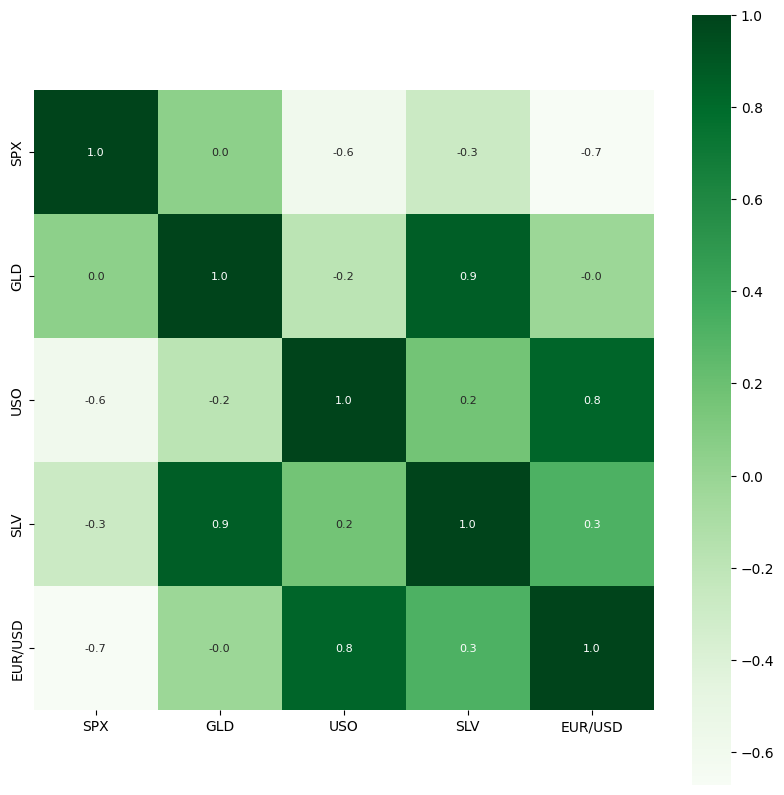

In [16]:
# Constructing the heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap="Greens" )

In [17]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


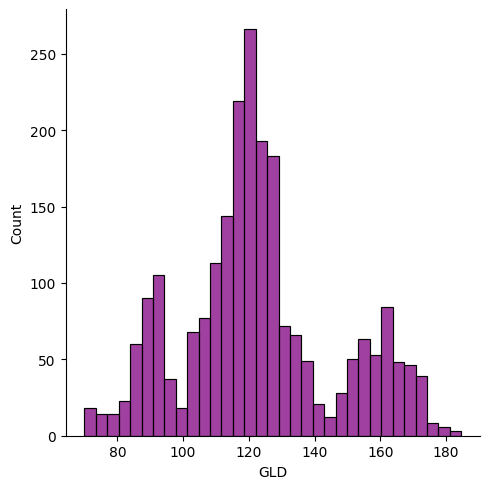

In [21]:
# checking the distribution of the GLD price

sns.displot(gold_data['GLD'], color='Purple')

Splitting the Features and Target

In [22]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [23]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [24]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into training and test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model Training:
* Random Forest Regressor

In [26]:
regressor = RandomForestRegressor()

In [27]:
# training the mmodel
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [29]:
# predictin on the test data
test_data_prediction = regressor.predict(x_test)

In [31]:
test_data_prediction

array([168.64499986,  81.99029991, 115.60830008, 127.80700061,
       120.72890113, 154.44269742, 150.44839955, 126.13940043,
       117.29149878, 125.9844006 , 116.5342009 , 171.58640091,
       141.90769856, 167.93399871, 115.20650014, 117.61710043,
       139.63400314, 170.09360082, 159.60810291, 157.6681994 ,
       155.20120034, 125.13720019, 175.96389934, 157.14710299,
       125.35100037,  93.87619956,  77.26880026, 120.67020005,
       119.07109933, 167.48489958,  88.28030019, 125.36280068,
        91.02990083, 117.67930025, 121.0044994 , 136.10590005,
       115.52680118, 115.14100075, 147.16429931, 107.18140079,
       104.50300274,  86.95849766, 126.52390036, 117.90009994,
       154.35729971, 119.61210011, 108.4136002 , 107.91959827,
        93.08560031, 126.9449985 ,  74.86900051, 113.70029962,
       121.39630009, 111.30269884, 118.91289911, 120.83449951,
       159.5114008 , 168.10930116, 147.17719647,  85.91709863,
        94.37280039,  87.05379923,  90.51710016, 119.13

In [32]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R-Squared error: ", error_score)

R-Squared error:  0.9885703881503609


Compare the actual values and the predicted values

In [33]:
y_test = list(y_test)

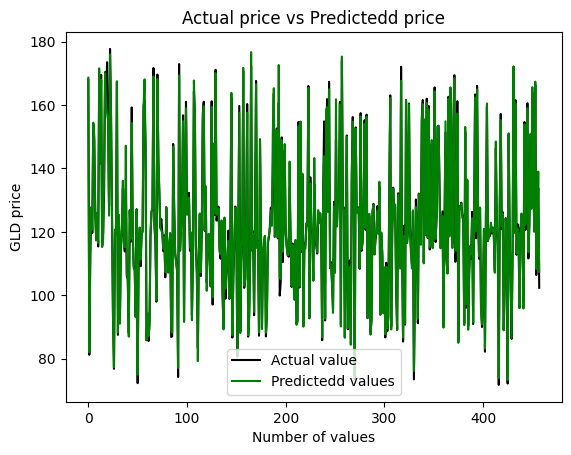

In [36]:
plt.plot(y_test, color='black', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predictedd values')
plt.title("Actual price vs Predictedd price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()